The purpose of this notebook is to find the appropriate number of components to use for the truncated SVD that will be applied to the dataset.

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from preprocessing import split_X_y
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [2]:
DATA_DIR = os.path.join(os.getcwd(), 'data')

In [3]:
#data = pd.read_csv(os.path.join(DATA_DIR, 'ind4_clustering_results.csv.gz'), compression='gzip')
data = pd.read_csv(os.path.join(DATA_DIR, 'ind4_clustering_results_var_genes.csv.gz'), compression='gzip')
data

,ORM1,ORM2,MMP3,FDCSP,S100A7,FABP7,KRT81,DCN,IL1B,AREG,...,MRGPRX4,C2CD4B,CTD.2012K14.8,CCR10,FAS,ADORA2B,PRMT9,PHGDH,HOXA4,cluster_label
0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,B
1,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.159752,1.159752,0.0,0.000000,0.0,B
2,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,L1
3,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.231624,0.000000,...,0.0,0.0,0.0,0.0,1.231624,0.000000,0.0,0.962358,0.0,B
4,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.198887,0.0,L1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4009,0.00000,0.000000,0.000000,0.0,0.000000,1.382332,3.756037,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.382332,0.0,L1
4010,0.00000,0.000000,3.002545,0.0,0.000000,0.000000,0.000000,0.0,1.139851,1.139851,...,0.0,0.0,0.0,0.0,1.139851,0.000000,0.0,0.000000,0.0,B
4011,0.00000,0.000000,0.000000,0.0,1.729568,1.199697,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,L1
4012,2.44477,2.946953,0.000000,0.0,2.142408,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.388285,0.000000,0.0,0.000000,0.0,L2


In [4]:
data = data[~data['cluster_label'].str.contains('Unclassified')]
data = data.reset_index(drop=True)

In [26]:
X, y = split_X_y(data)
X

,ORM1,ORM2,MMP3,FDCSP,S100A7,FABP7,KRT81,DCN,IL1B,AREG,...,RP11.597D13.9,MRGPRX4,C2CD4B,CTD.2012K14.8,CCR10,FAS,ADORA2B,PRMT9,PHGDH,HOXA4
0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.159752,1.159752,0.0,0.000000,0.0
2,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.231624,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.231624,0.000000,0.0,0.962358,0.0
4,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.198887,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3927,0.00000,0.000000,0.000000,0.0,0.000000,1.382332,3.756037,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1.382332,0.0
3928,0.00000,0.000000,3.002545,0.0,0.000000,0.000000,0.000000,0.0,1.139851,1.139851,...,0.0,0.0,0.0,0.0,0.0,1.139851,0.000000,0.0,0.000000,0.0
3929,0.00000,0.000000,0.000000,0.0,1.729568,1.199697,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3930,2.44477,2.946953,0.000000,0.0,2.142408,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.388285,0.000000,0.0,0.000000,0.0


In [27]:
y = pd.DataFrame(y)
y

,0
0,1
1,1
2,2
3,1
4,2
...,...
3927,2
3928,1
3929,2
3930,0


In [10]:
svd = TruncatedSVD(n_components=750, random_state=42)

# Fit TruncatedSVD to the data
svd.fit(X)

# Compute the explained variance ratio
var_explained = svd.explained_variance_ratio_.sum()

# Print the total variance explained
print("Total variance explained:", var_explained)

Total variance explained: 0.9533429437599428


In [60]:
def plot_scree_plot(data, max_components=50):
    # Perform TruncatedSVD
    svd = TruncatedSVD(n_components=max_components)
    svd.fit(data)

    # Extract the singular values
    singular_values = svd.singular_values_

    # Compute the explained variance ratio
    explained_variance_ratio = np.square(singular_values) / np.square(singular_values).sum()

    # Plot the scree plot with explained variance on the y-axis
    plt.figure(figsize=(10, 8))
    plt.plot(range(1, len(singular_values) + 1), explained_variance_ratio, 'bo-', label='Explained Variance')
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance')
    plt.title('Scree Plot')
    plt.legend()
    plt.grid(True)
    plt.savefig('svd_scree_plot.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.savefig('svd_scree_plot.pdf', dpi=300, facecolor='white')
    plt.show()


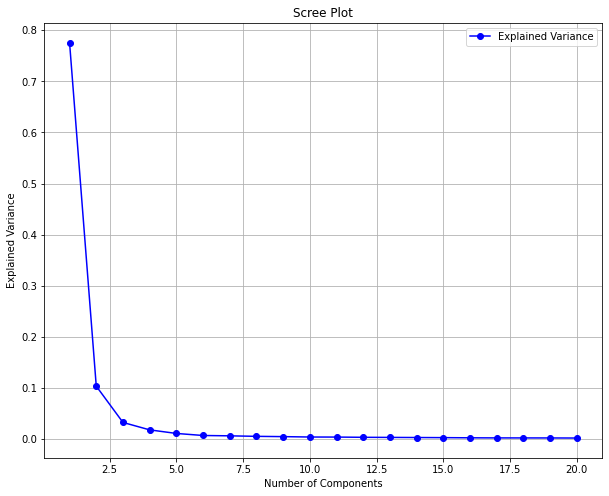

In [61]:
plot_scree_plot(X, 20)

In [49]:
singular_values = svd.singular_values_
singular_values

array([1376.81286905,  503.54070992,  283.01115902,  211.08807113,
        165.77323973,  132.97996292,  126.6960903 ,  116.69999723,
        110.72087745,  101.87097119,  100.54223122,   94.9799158 ,
         92.35276898,   89.40108736,   86.37298962,   81.51983606,
         78.78336985,   78.15148411,   77.2171174 ,   75.18098344,
         74.48973901,   73.30938774,   71.22727884,   69.29879572,
         68.64178525,   67.6693195 ,   67.49465602,   66.72985531,
         66.4071523 ,   65.49020922,   64.68288476,   64.12259006,
         63.14458504,   62.91386587,   61.44395973,   60.85979159,
         60.54367098,   60.26792822,   59.7700042 ,   59.17637318,
         58.8060164 ,   58.43925534,   57.7753449 ,   57.65444793,
         57.12624406,   56.7416292 ,   56.67032667,   56.07480283,
         55.93135344,   55.09544542,   54.8781852 ,   54.11835997,
         53.86141009,   53.6559901 ,   53.52448849,   53.02387822,
         52.91047498,   52.63303011,   52.48406818,   52.24387